In [2]:
import numpy as np
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
%matplotlib inline
# seabornライブラリをsnsという省略名でインポート
import seaborn as sns

## 訓練データの読み込み

In [3]:
# CSVファイル読み込み（訓練データ）
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [4]:
# 性別を変換する（訓練データ）
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)
df.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,0,1
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1,0,1
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,0,1
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1,0,1
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,1,0


In [5]:
#　性別と結果は数値でないため、除外する（分析用）
col_categoric = ["Gender", "disease"]
df_numeric = df_train.drop(col_categoric, axis=1).copy()
df_categoric = df_train[col_categoric].copy()

## 解析する

In [6]:
df_train.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706,0.174118,0.825882
std,16.453672,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226,0.379434,0.379434
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000,0.000000,0.000000
25%,32.000000,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000,0.000000,1.000000
50%,48.000000,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000,0.000000,1.000000
75%,62.000000,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000,0.000000,1.000000
max,78.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000,1.000000,1.000000


In [7]:
n_data = df_train.loc[df_train['disease']==0,:].copy()         # non
d_data = df_train.loc[df_train['disease']==1,:].copy()         # disease

In [8]:
n_data.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.0,472.000000,472.000000
mean,46.254237,0.825693,0.210563,234.232684,15.975088,29.849293,7.087753,3.605900,1.207145,0.0,0.209746,0.790254
std,16.304396,0.176583,0.553654,67.266382,8.397985,28.303190,0.861106,0.556395,0.200756,0.0,0.407559,0.407559
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.295068,0.732968,0.0,0.000000,0.000000
25%,32.000000,0.746191,0.120786,211.830825,12.533705,20.259545,6.714659,3.165267,1.029563,0.0,0.000000,1.000000
50%,48.000000,0.797032,0.166680,215.761897,14.825259,22.265808,7.350960,3.630840,1.280918,0.0,0.000000,1.000000
75%,61.000000,0.836842,0.201156,221.424607,17.028880,27.981309,7.538761,4.067706,1.294483,0.0,0.000000,1.000000
max,78.000000,1.734959,11.935322,657.616053,116.407037,481.935324,8.733841,5.016970,1.821496,0.0,1.000000,1.000000


In [8]:
d_data.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.000000,378.000000
mean,47.055556,2.583358,1.101431,319.634370,74.448314,99.937924,6.963035,3.407023,1.066434,1.0,0.129630,0.870370
std,16.649120,3.418749,2.172383,284.042393,214.391912,153.542670,0.810228,0.545244,0.234328,0.0,0.336341,0.336341
min,16.000000,0.642805,0.074207,185.491189,8.570383,11.601122,4.971703,2.180884,0.627133,1.0,0.000000,0.000000
25%,32.000000,0.857066,0.187951,220.623552,17.188434,27.864092,6.750529,3.126030,0.968234,1.0,0.000000,1.000000
50%,48.000000,1.204637,0.277124,227.268717,22.228160,56.648308,6.894533,3.219547,1.017616,1.0,0.000000,1.000000
75%,64.000000,1.940341,0.788026,238.110473,33.368001,67.604461,7.510301,3.690715,1.250521,1.0,0.000000,1.000000
max,75.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.014720,1.813936,1.0,1.000000,1.000000


In [9]:
col='T_Bil'
pd.concat([df_train[col], n_data[col], d_data[col]], axis=1).describe()

,T_Bil,T_Bil,T_Bil
count,850.000000,472.000000,378.000000
mean,1.607337,0.825693,2.583358
std,2.443585,0.176583,3.418749
min,0.585961,0.585961,0.642805
25%,0.781258,0.746191,0.857066
50%,0.835591,0.797032,1.204637
75%,1.196759,0.836842,1.940341
max,23.017027,1.734959,23.017027


In [10]:
col='D_Bil'
pd.concat([df_train[col], n_data[col], d_data[col]], axis=1).describe()

,D_Bil,D_Bil,D_Bil
count,850.000000,472.000000,378.000000
mean,0.606737,0.210563,1.101431
std,1.569032,0.553654,2.172383
min,0.034861,0.034861,0.074207
25%,0.144889,0.120786,0.187951
50%,0.194085,0.166680,0.277124
75%,0.335447,0.201156,0.788026
max,17.692164,11.935322,17.692164


In [11]:
col='ALP'
pd.concat([df_train[col], n_data[col], d_data[col]], axis=1).describe()

,ALP,ALP,ALP
count,850.000000,472.000000,378.000000
mean,272.211316,234.232684,319.634370
std,200.348515,67.266382,284.042393
min,163.261838,163.261838,185.491189
25%,213.991414,211.830825,220.623552
50%,220.092503,215.761897,227.268717
75%,229.455927,221.424607,238.110473
max,2108.483728,657.616053,2108.483728


In [12]:
col='ALT_GPT'
pd.concat([df_train[col], n_data[col], d_data[col]], axis=1).describe()

,ALT_GPT,ALT_GPT,ALT_GPT
count,850.000000,472.000000,378.000000
mean,41.978476,15.975088,74.448314
std,145.927366,8.397985,214.391912
min,3.924518,3.924518,8.570383
25%,13.644658,12.533705,17.188434
50%,16.638001,14.825259,22.228160
75%,23.056081,17.028880,33.368001
max,1423.186473,116.407037,1423.186473


In [13]:
col='AST_GOT'
pd.concat([df_train[col], n_data[col], d_data[col]], axis=1).describe()

,AST_GOT,AST_GOT,AST_GOT
count,850.000000,472.000000,378.000000
mean,61.018120,29.849293,99.937924
std,110.125390,28.303190,153.542670
min,11.283497,11.283497,11.601122
25%,21.239157,20.259545,27.864092
50%,27.056026,22.265808,56.648308
75%,56.461568,27.981309,67.604461
max,814.439397,481.935324,814.439397


In [14]:
col='TP'
pd.concat([df_train[col], n_data[col], d_data[col]], axis=1).describe()

,TP,TP,TP
count,850.000000,472.000000,378.000000
mean,7.032290,7.087753,6.963035
std,0.840664,0.861106,0.810228
min,4.858679,4.858679,4.971703
25%,6.730612,6.714659,6.750529
50%,6.915580,7.350960,6.894533
75%,7.536151,7.538761,7.510301
max,8.739000,8.733841,8.739000


In [15]:
col='Alb'
pd.concat([df_train[col], n_data[col], d_data[col]], axis=1).describe()

,Alb,Alb,Alb
count,850.000000,472.000000,378.000000
mean,3.517458,3.605900,3.407023
std,0.559942,0.556395,0.545244
min,2.180884,2.295068,2.180884
25%,3.139153,3.165267,3.126030
50%,3.621339,3.630840,3.219547
75%,3.712524,4.067706,3.690715
max,5.016970,5.016970,5.014720


# データの可視化

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


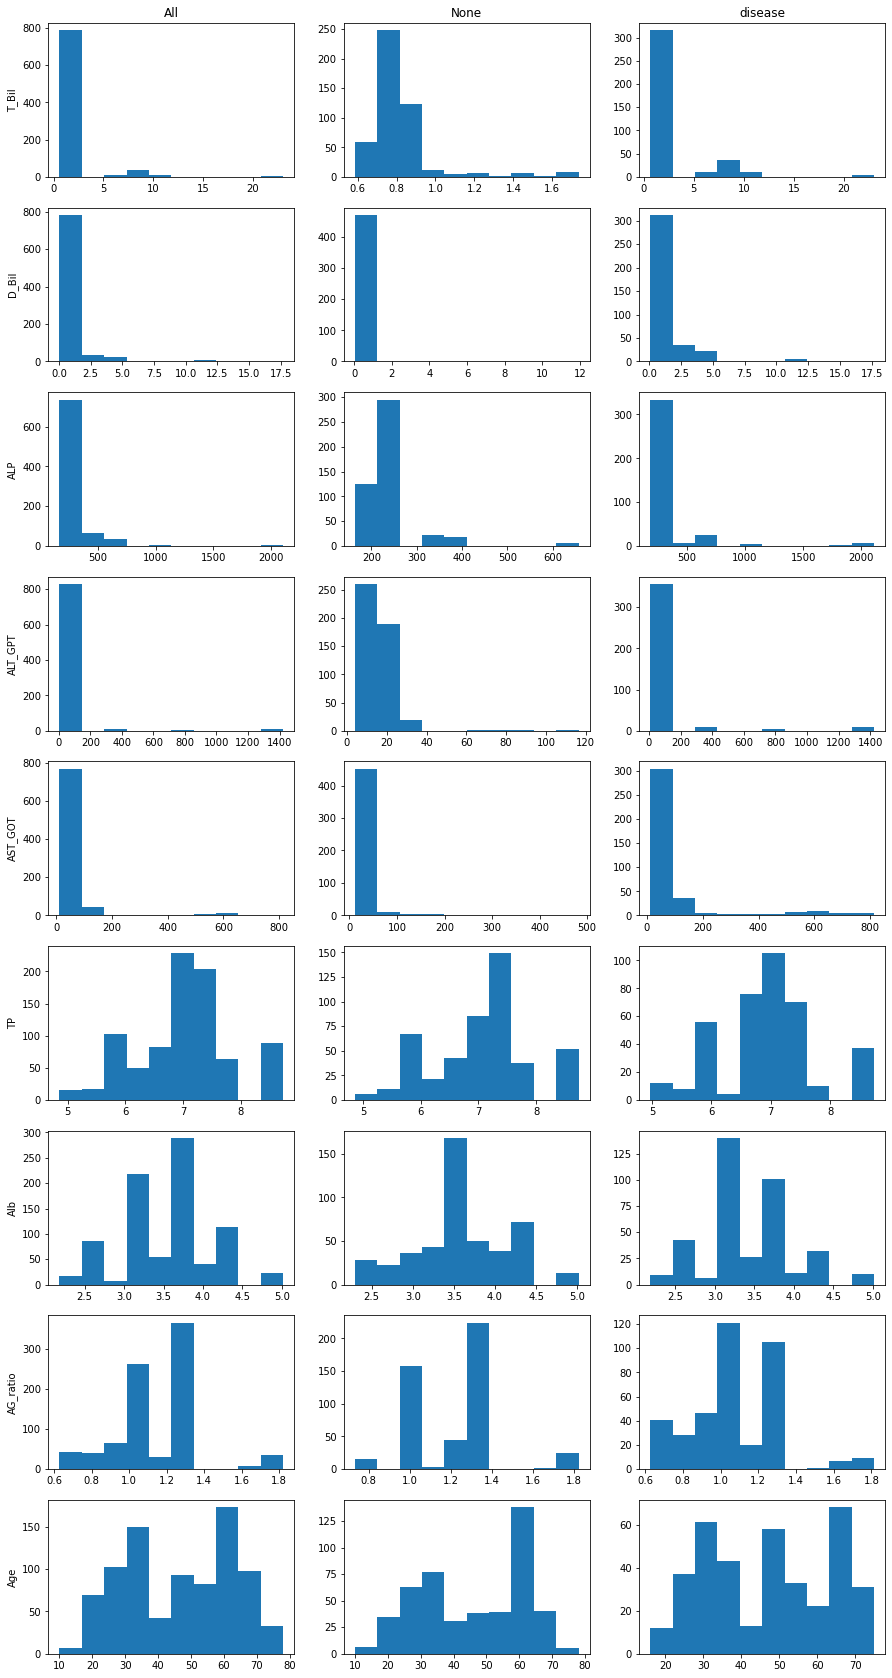

In [16]:

contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio','Age']

n_x_cont = n_data[contin_cols].copy()
d_x_cont = d_data[contin_cols].copy()

col_val=3
row_val=9

i = 0
plt.figure(figsize=(15,30))
for col in n_x_cont.columns.values:
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([df_train.loc[:, col]])
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1    
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([n_x_cont.loc[:, col]])
    if (i + 1) == 2:
        plt.title('None')
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([d_x_cont.loc[:, col]])
    if (i + 1) == 3:
        plt.title('disease')
    i += 1

plt.show()

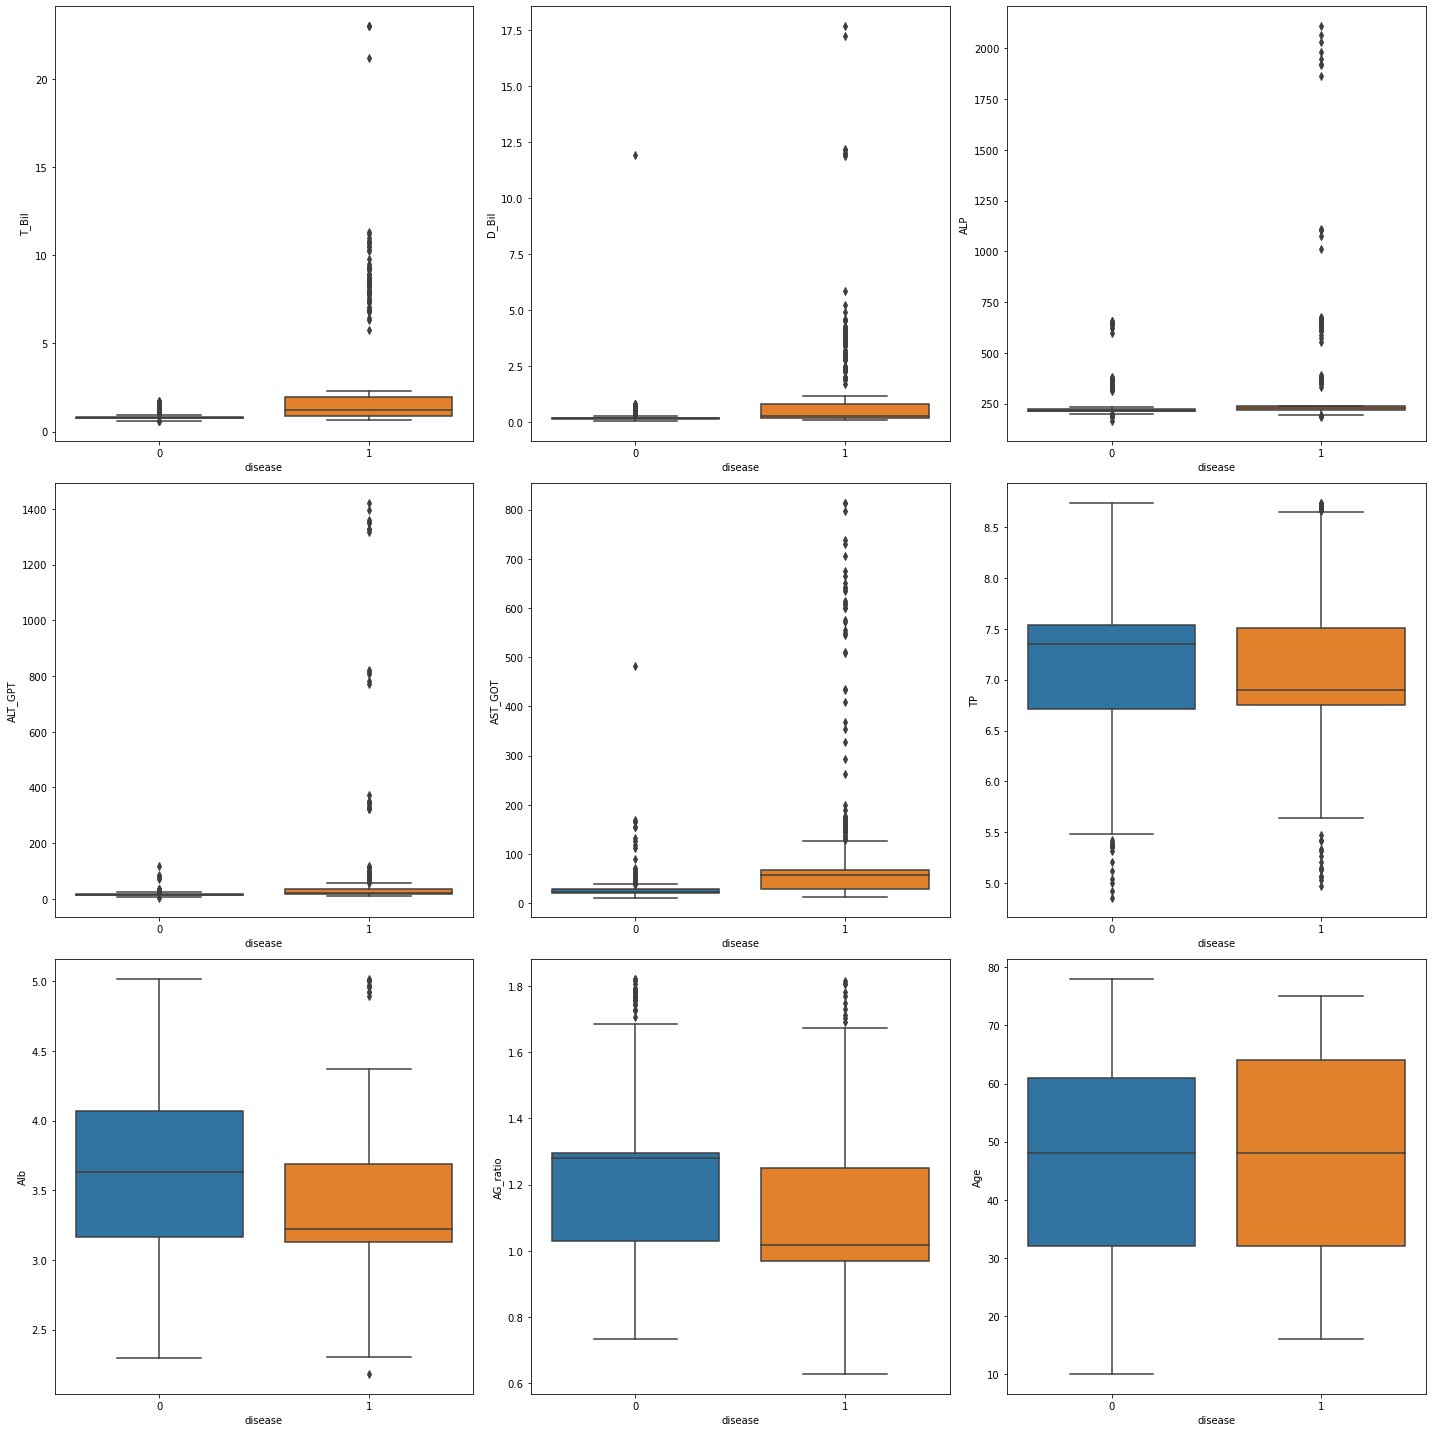

In [17]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil"   ,data=df_train,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil"   ,data=df_train,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP"     ,data=df_train,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT" ,data=df_train,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT" ,data=df_train,ax=ax[1][1])
sns.boxplot(x="disease",y="TP"      ,data=df_train,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb"     ,data=df_train,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df_train,ax=ax[2][1])
sns.boxplot(x="disease",y="Age"     ,data=df_train,ax=ax[2][2])
plt.tight_layout()


Gender


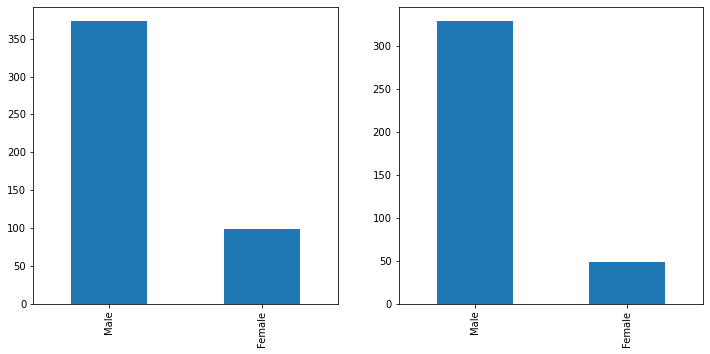

In [18]:

#cate_cols = ['Age','Gender']
cate_cols = ['Gender']

n_x_cate = n_data[cate_cols].copy()
d_x_cate = d_data[cate_cols].copy()


col_val=2
row_val=2

i = 0
plt.figure(figsize=(12,12))
for col in cate_cols:
    print(col)
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    val = n_x_cate[col].value_counts()
    val.plot.bar()
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    val = d_x_cate[col].value_counts()
    val.plot.bar()
    i += 1

plt.show()

# ３σを最大値に置き換えた後に、最大値で割る

In [19]:
df_train = pd.read_csv('train.csv')
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)
df_analize1 = df.copy()

In [20]:
df_desc=df_analize1.describe()

In [21]:
bai3 = 3

col='T_Bil'
std=df_desc.loc['75%',col]*bai3
std=df_analize1.loc[df_analize1[col]<(std),col].max()
df_analize1.loc[df_analize1[col]>(std),col]=std

col='D_Bil'
std=df_desc.loc['75%',col]*bai3
std=df_analize1.loc[df_analize1[col]<(std),col].max()
df_analize1.loc[df_analize1[col]>(std),col]=std

col='ALP'
std=df_desc.loc['75%',col]*bai3
#std=250
std=df_analize1.loc[df_analize1[col]<(std),col].max()
df_analize1.loc[df_analize1[col]>(std),col]=std

col='ALT_GPT'
std=df_desc.loc['75%',col]*bai3
std=df_analize1.loc[df_analize1[col]<(std),col].max()
df_analize1.loc[df_analize1[col]>(std),col]=std

col='AST_GOT'
std=df_desc.loc['75%',col]*bai3
std=df_analize1.loc[df_analize1[col]<(std),col].max()
df_analize1.loc[df_analize1[col]>(std),col]=std

col='Alb'
std=df_desc.loc['75%',col]*bai3
std=df_analize1.loc[df_analize1[col]<(std),col].max()
df_analize1.loc[df_analize1[col]>(std),col]=std

col='AG_ratio'
std=df_desc.loc['75%',col]*bai3
std=df_analize1.loc[df_analize1[col]<(std),col].max()
df_analize1.loc[df_analize1[col]>(std),col]=std


col='TP'
std=df_desc.loc['75%',col]*bai3
std=5.5
df_analize1.loc[df_analize1[col]<(std),col]=std

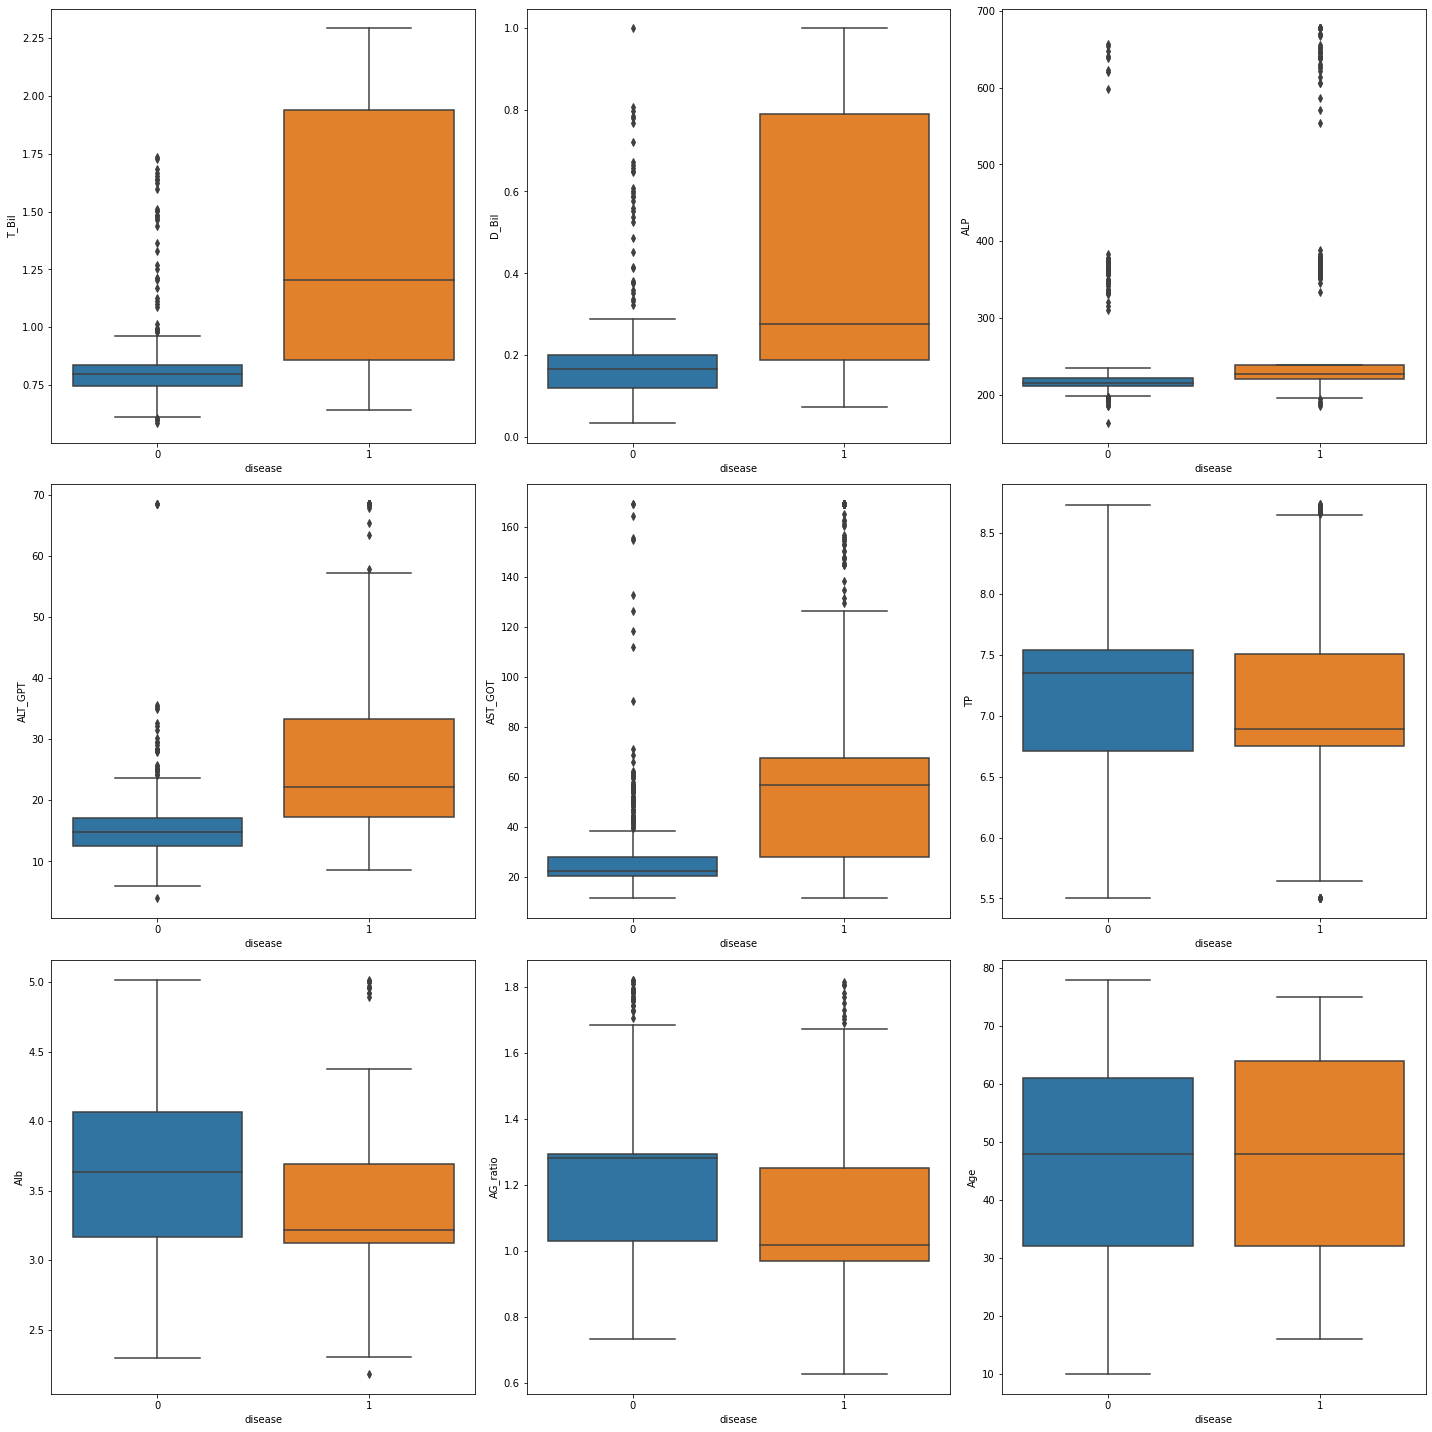

In [22]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil"   ,data=df_analize1,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil"   ,data=df_analize1,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP"     ,data=df_analize1,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT" ,data=df_analize1,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT" ,data=df_analize1,ax=ax[1][1])
sns.boxplot(x="disease",y="TP"      ,data=df_analize1,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb"     ,data=df_analize1,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df_analize1,ax=ax[2][1])
sns.boxplot(x="disease",y="Age"     ,data=df_analize1,ax=ax[2][2])
plt.tight_layout()


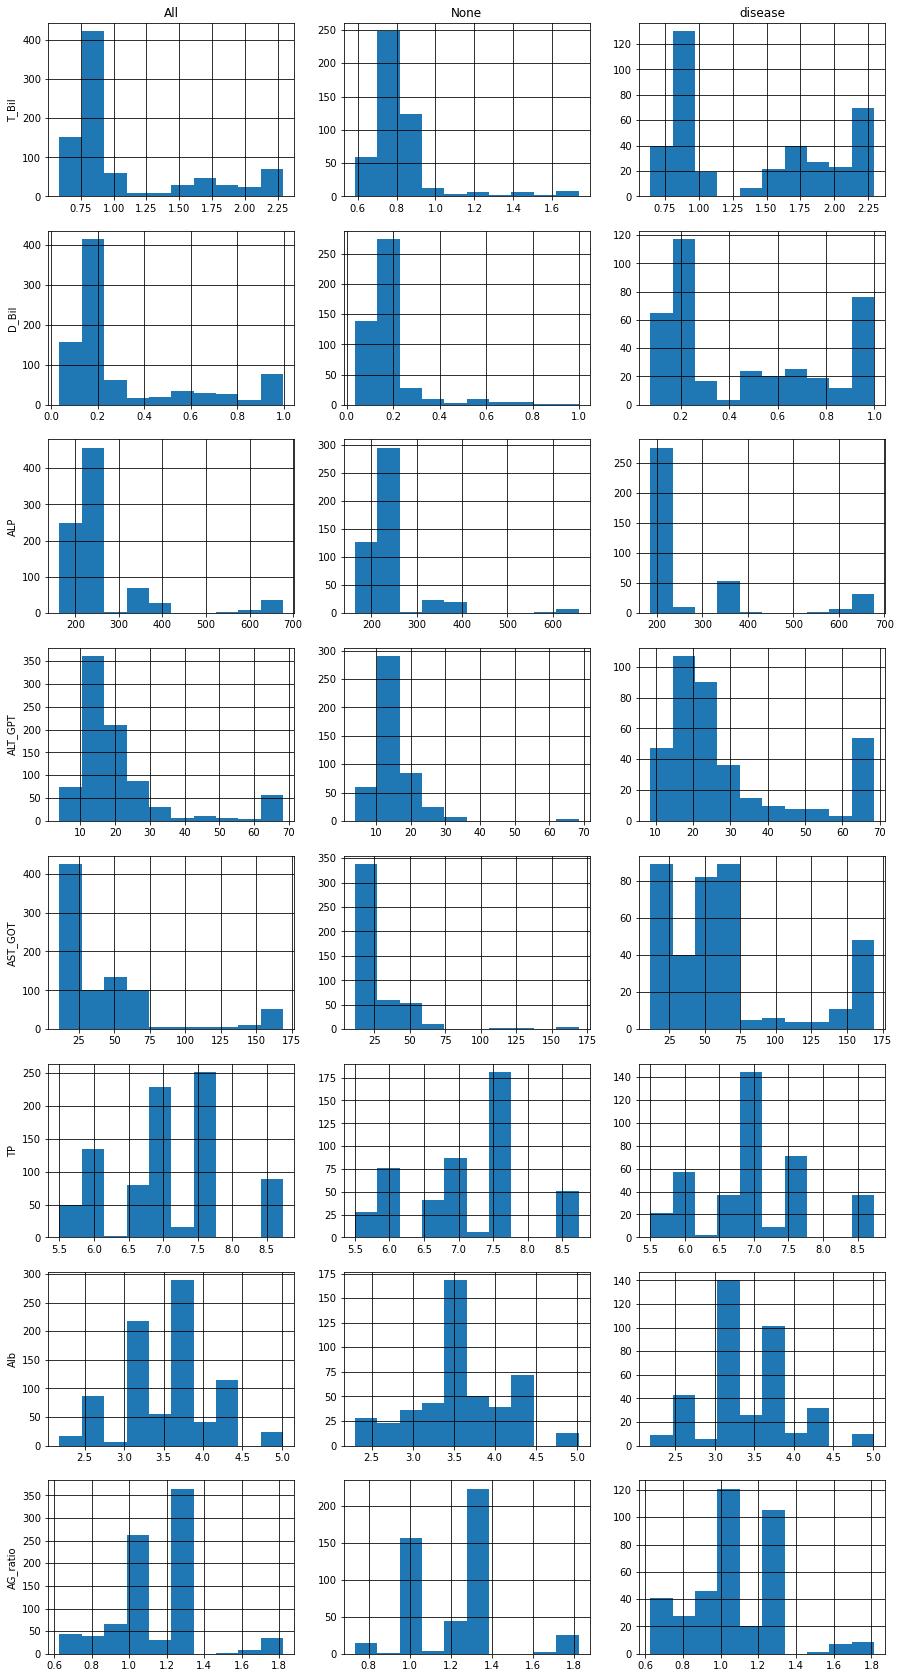

In [23]:
categ_cols = ['Age','Gender']
contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']

#n_x_cate = df[categ_cols].loc[df['disease']==0,:].copy()
n_x_cont = df_analize1[contin_cols].loc[df_analize1['disease']==0,:].copy()
#d_x_cate = df[categ_cols].loc[df['disease']==1,:].copy()
d_x_cont = df_analize1[contin_cols].loc[df_analize1['disease']==1,:].copy()

col_val=3
row_val=8

i = 0
plt.figure(figsize=(15,30))
for col in n_x_cont.columns.values:
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([df_analize1.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([n_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 2:
        plt.title('None')
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([d_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 3:
        plt.title('disease')
    i += 1
    

plt.show()

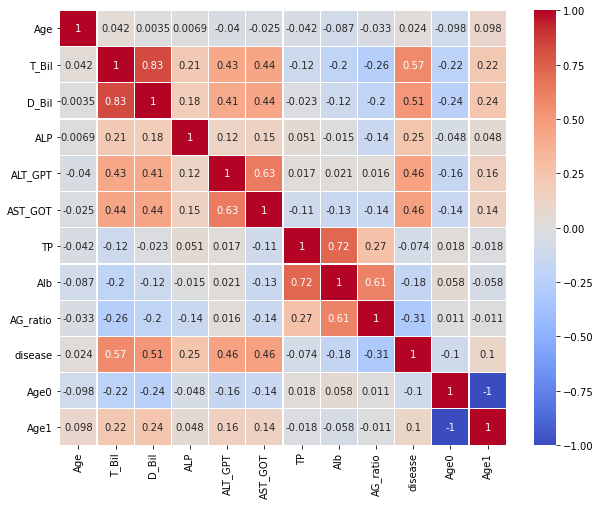

In [24]:
# seabornライブラリをsnsという省略名でインポート
import seaborn as sns
plt.figure(figsize=(10,8))
df_sns = df_analize1.copy()
sns.heatmap(df_sns.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()


In [25]:
df_analize1.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.084963,0.316112,257.587901,21.924368,45.472679,7.042263,3.517458,1.144570,0.444706,0.174118,0.825882
std,16.453672,0.504169,0.280137,105.247085,14.908823,39.316005,0.819913,0.559942,0.227237,0.497226,0.379434,0.379434
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,5.500000,2.180884,0.627133,0.000000,0.000000,0.000000
25%,32.000000,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000,0.000000,1.000000
50%,48.000000,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000,0.000000,1.000000
75%,62.000000,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000,0.000000,1.000000
max,78.000000,2.292767,0.998288,677.315881,68.457755,169.029000,8.739000,5.016970,1.821496,1.000000,1.000000,1.000000


In [26]:
def xConv(x_tmp):
    # T_Bilの変換
    bins = [0,  0.85,  1.5,   100]
    x_tmp=comCutCnnect(x_tmp, bins, 'T_Bil')

    # D_Bilの変換
    bins = [0,  0.18, 0.21,  0.3,  100]
    x_tmp=comCutCnnect(x_tmp,  bins, 'D_Bil' )
    
    # ALPの変換
    bins = [0,  210, 220, 230, 600,  2500]
    x_tmp=comCutCnnect(x_tmp,  bins, 'ALP' )
    
    # ALT_GPTの変換
    bins = [0,  15,   20,   40,  1500]
    x_tmp=comCutCnnect(x_tmp,  bins, 'ALT_GPT' )
    
    # AST_GOTの変換
    bins = [0,  22,   30,   75,   1000]
    x_tmp=comCutCnnect(x_tmp, bins, 'AST_GOT' )

    # TPの変換
    bins = [0,  6.0,  6.8,  7,  7.5,  8,  1000]
    x_tmp=comCutCnnect(x_tmp,  bins, 'TP' )
        
    # Albの変換
    bins = [0,  3.0,  3.3,  3.6, 3.7, 3.8,1000]
    x_tmp=comCutCnnect(x_tmp,  bins, 'Alb' )

    # AG_ratioの変換
    bins = [0, 1.0,  1.05,  1.1, 1.2, 1.3, 1000]
    x_tmp=comCutCnnect(x_tmp,  bins, 'AG_ratio' )
    
    # Ageの変換の変換
    bins = [0, 18, 25, 30, 35, 40, 50, 60, 70, 80 ,1000]
    x_tmp=comCutCnnect(x_tmp,  bins, 'Age' )
        
    return x_tmp


def comCutCnnect(x_tmp, bins ,col ):   
    X_cut = pd.cut(x_tmp[col], bins=bins, labels=False)
    x_tmp[col] = X_cut
    #cutTemp = np.zeros((len(X_cut), len(bins) -1 ), dtype=int)
    #cutTemp[np.arange(len(X_cut)), X_cut.T] = 1
    
    #df=pd.DataFrame(cutTemp ,columns=[col + str(x) for x in range(cutTemp.shape[1])])
    
    # 列の削除
    #x_tmp.drop(columns=[col], inplace=True, axis=1)
    # 列の追加
    #x_tmp = pd.concat([x_tmp, df], axis=1)

    return x_tmp 

In [27]:
df_analize2=xConv(df.copy())

In [28]:
df_analize2.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,4.677647,0.676471,1.250588,1.657647,1.107059,1.231765,2.447059,2.511765,2.462353,0.444706,0.174118,0.825882
std,2.193704,0.815074,1.235338,1.091446,0.997794,0.994296,1.623632,1.705801,1.922925,0.497226,0.379434,0.379434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,5.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,4.000000,0.000000,0.000000,1.000000
75%,7.000000,1.000000,3.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,1.000000,0.000000,1.000000
max,8.000000,2.000000,3.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000


In [29]:
df_analize2.loc[df_train['disease']==0,:].describe()         # non

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.0,472.000000,472.000000
mean,4.639831,0.237288,0.707627,1.245763,0.637712,0.758475,2.616525,2.841102,2.997881,0.0,0.209746,0.790254
std,2.205365,0.481998,0.939409,0.936964,0.752982,0.837632,1.702746,1.673499,1.768441,0.0,0.407559,0.407559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,1.000000
50%,5.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,4.000000,0.0,0.000000,1.000000
75%,7.000000,0.000000,1.000000,2.000000,1.000000,1.000000,4.000000,5.000000,4.000000,0.0,0.000000,1.000000
max,8.000000,2.000000,3.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.000000,0.0,1.000000,1.000000


In [30]:
df_analize2.loc[df_train['disease']==1,:].describe()         # disease

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.000000,378.000000
mean,4.724868,1.224868,1.928571,2.171958,1.693122,1.822751,2.235450,2.100529,1.793651,1.0,0.129630,0.870370
std,2.181053,0.814143,1.226445,1.052750,0.955789,0.848035,1.494504,1.657856,1.900652,0.0,0.336341,0.336341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,1.000000
50%,5.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.0,0.000000,1.000000
75%,7.000000,2.000000,3.000000,3.000000,2.000000,2.000000,4.000000,3.000000,4.000000,1.0,0.000000,1.000000
max,8.000000,2.000000,3.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.000000,1.0,1.000000,1.000000


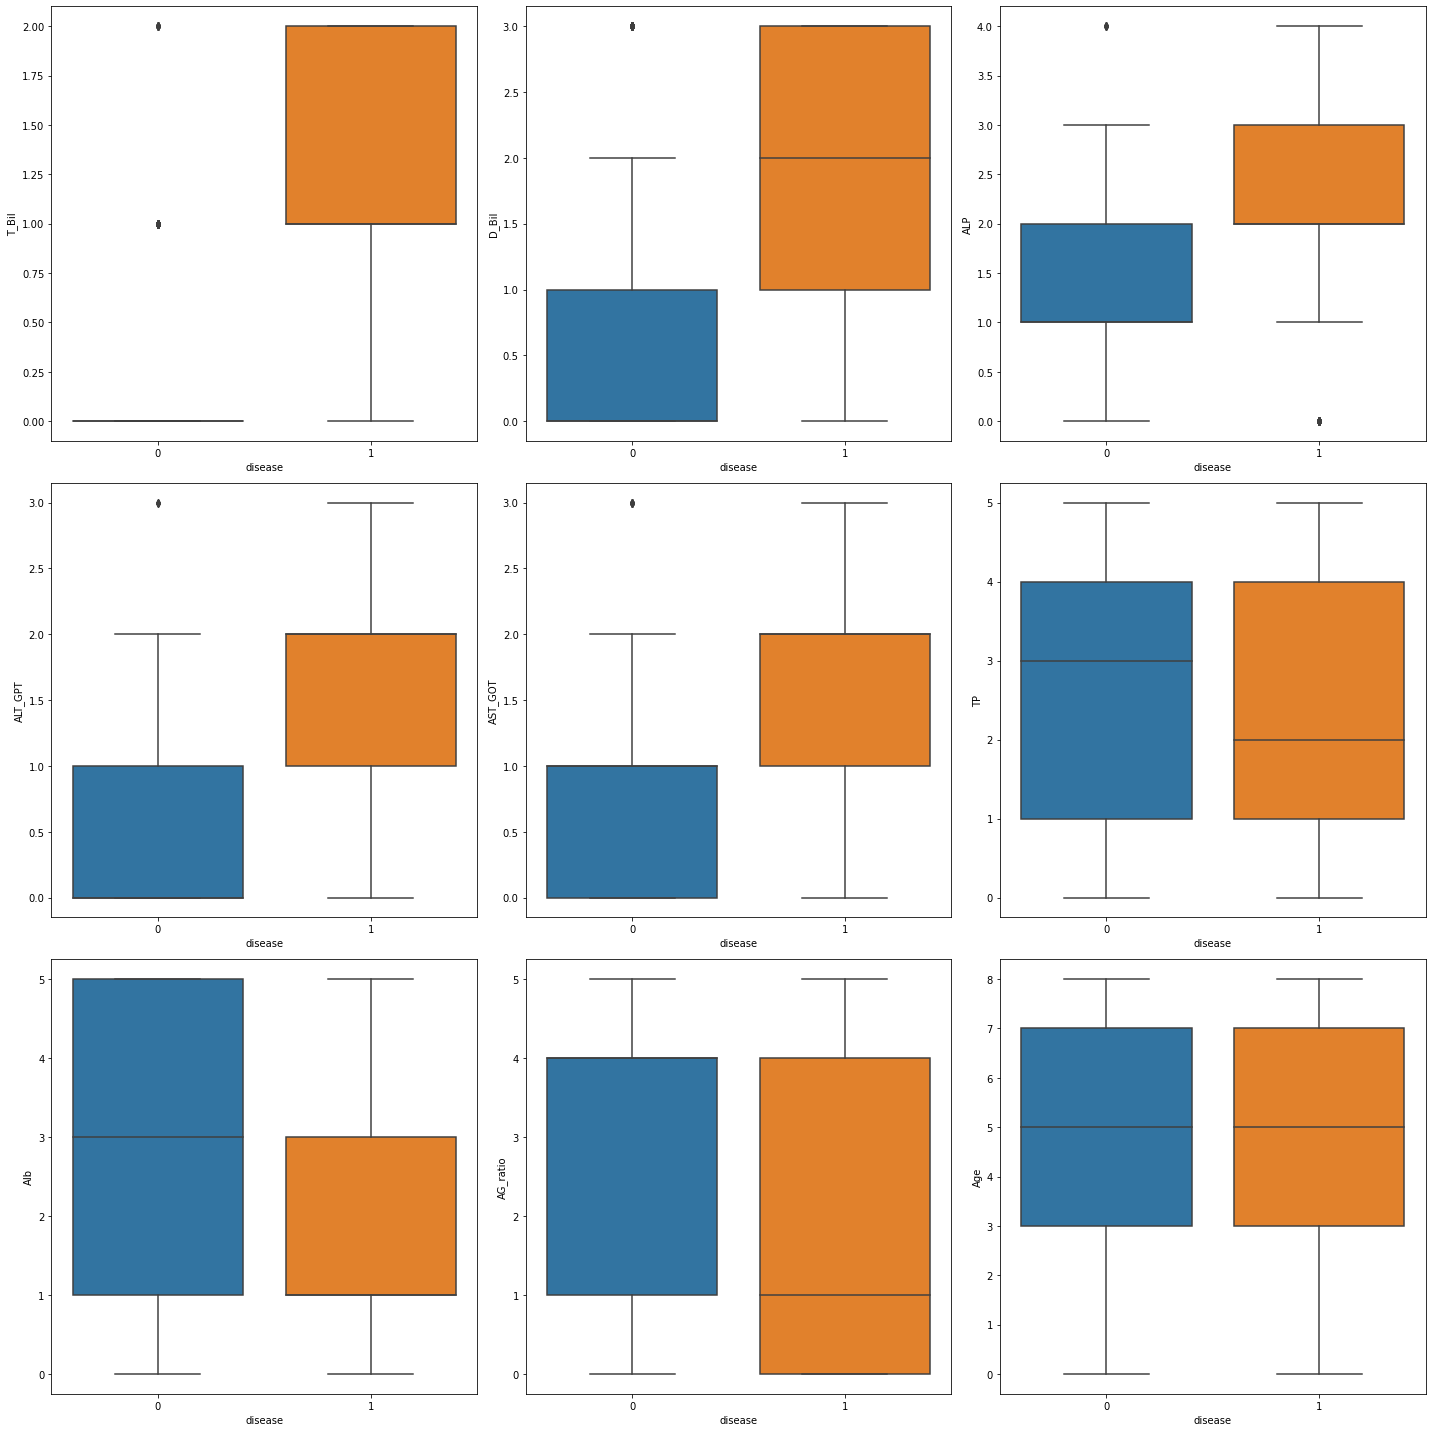

In [31]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil"   ,data=df_analize2,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil"   ,data=df_analize2,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP"     ,data=df_analize2,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT" ,data=df_analize2,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT" ,data=df_analize2,ax=ax[1][1])
sns.boxplot(x="disease",y="TP"      ,data=df_analize2,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb"     ,data=df_analize2,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df_analize2,ax=ax[2][1])
sns.boxplot(x="disease",y="Age"     ,data=df_analize2,ax=ax[2][2])
plt.tight_layout()


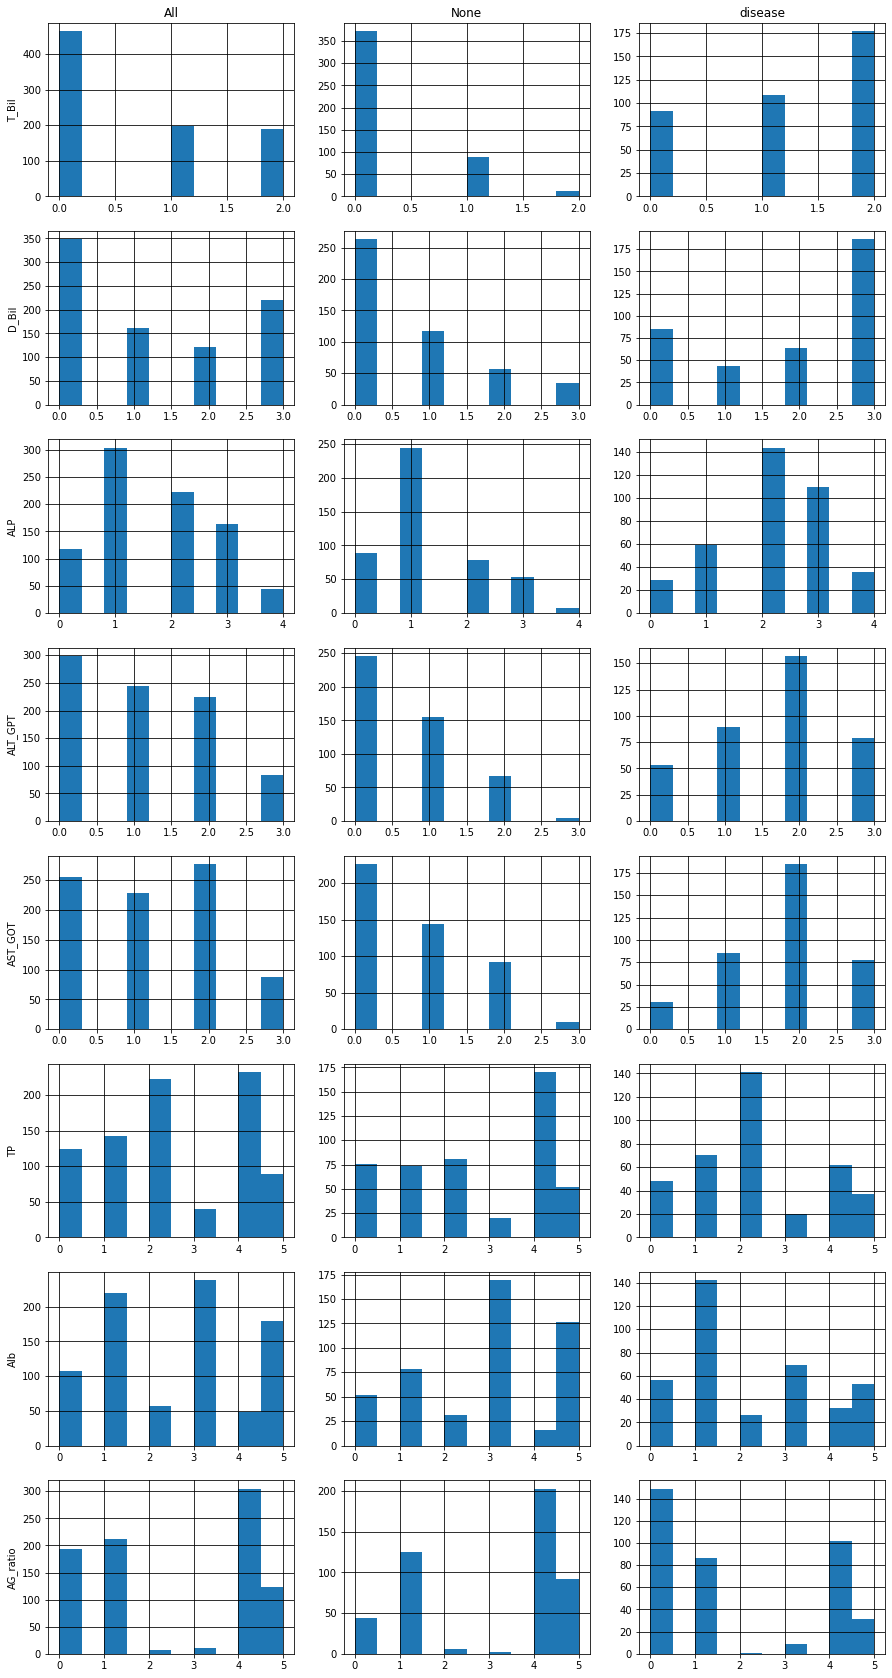

In [32]:
categ_cols = ['Age','Gender']
contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']

#n_x_cate = df[categ_cols].loc[df['disease']==0,:].copy()
n_x_cont = df_analize2[contin_cols].loc[df_analize2['disease']==0,:].copy()
#d_x_cate = df[categ_cols].loc[df['disease']==1,:].copy()
d_x_cont = df_analize2[contin_cols].loc[df_analize2['disease']==1,:].copy()

col_val=3
row_val=8

i = 0
plt.figure(figsize=(15,30))
for col in n_x_cont.columns.values:
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([df_analize2.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([n_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 2:
        plt.title('None')
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([d_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 3:
        plt.title('disease')
    i += 1
    

plt.show()

# 機械的にbin

In [61]:
def binSplit2(x_cont):
    contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']
    
    for col in contin_cols:
        
        split_min = 0
        split_min2 = df_desc.loc['min',col]
        std_m = df_desc.loc['std',col]/3
        std_p = df_desc.loc['std',col]*3
        split1 = df_desc.loc['25%',col]
        split2 = df_desc.loc['50%',col]
        split3 = df_desc.loc['75%',col]
        split_max=  df_desc.loc['max',col]
        split_max2=  df_desc.loc['max',col]*10
        bins = [split_min, split_min2,  split1,  split2,  split3, std_m,  std_p, split_max]

#        if col == 'T_Bil':
#            bins.append(0.2)
#            bins.append(1.2)
#        elif col == 'T_Bil':
#            bins.append(0.4)
#        elif col == 'ALP':
#            bins.append(100.0)
#            bins.append(35.0)
#        elif col == 'ALT_GPT':
#            bins.append(30.0)
#        elif col == 'AST_GOT':
#            bins.append(30.0)
#        elif col == 'TP':
#            bins.append(6.5)
#            bins.append(7.9)
#        elif col == 'Alb':
#            bins.append(3.2)
#            bins.append(4.6)
#        elif col == 'AG_ratio':
#            bins.append(1.2)
#            bins.append(2.0)
#        
        bins = np.sort(bins)
        
        print(col , ':', bins)
        x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)
        
    return x_cont
        
    

In [62]:
df_analize3=binSplit2(df.copy())

T_Bil : [ 0.          0.58596105  0.78125844  0.8145283   0.83559147  1.19675913
  7.33075472 23.0170268 ]
D_Bil : [ 0.          0.03486055  0.14488863  0.19408535  0.33544666  0.52301064
  4.70709572 17.6921642 ]
ALP : [   0.           66.78283837  163.26183776  213.99141387  220.09250306
  229.4559266   601.0455453  2108.48372817]
ALT_GPT : [   0.            3.92451826   13.64465827   16.63800071   23.0560808
   48.64245535  437.78209811 1423.18647275]
AST_GOT : [  0.          11.28349672  21.23915723  27.05602561  36.70846334
  56.4615678  330.37617006 814.43939659]
TP : [0.         0.2802213  2.5219917  4.85867896 6.73061246 6.91557972
 7.53615089 8.73900048]
Alb : [0.         0.18664721 1.67982489 2.18088427 3.13915349 3.62133905
 3.71252406 5.01697039]
AG_ratio : [0.         0.07574573 0.62713268 0.68171159 1.004466   1.20501596
 1.28788017 1.8214957 ]


In [63]:
df_analize3.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,3.148235,2.723529,3.549412,2.597647,2.938824,4.498824,4.498824,4.489412,0.444706,0.174118,0.825882
std,16.453672,1.647828,1.461734,1.207761,1.294364,1.609314,1.121846,1.121846,1.139506,0.497226,0.379434,0.379434
min,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.250000,1.250000,2.250000,1.250000,1.250000,3.250000,3.250000,3.250000,0.000000,0.000000,1.000000
50%,48.000000,3.500000,2.500000,3.500000,2.500000,2.500000,4.500000,4.500000,4.500000,0.000000,0.000000,1.000000
75%,62.000000,4.750000,3.750000,4.750000,3.750000,4.750000,5.750000,5.750000,5.750000,1.000000,0.000000,1.000000
max,78.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000


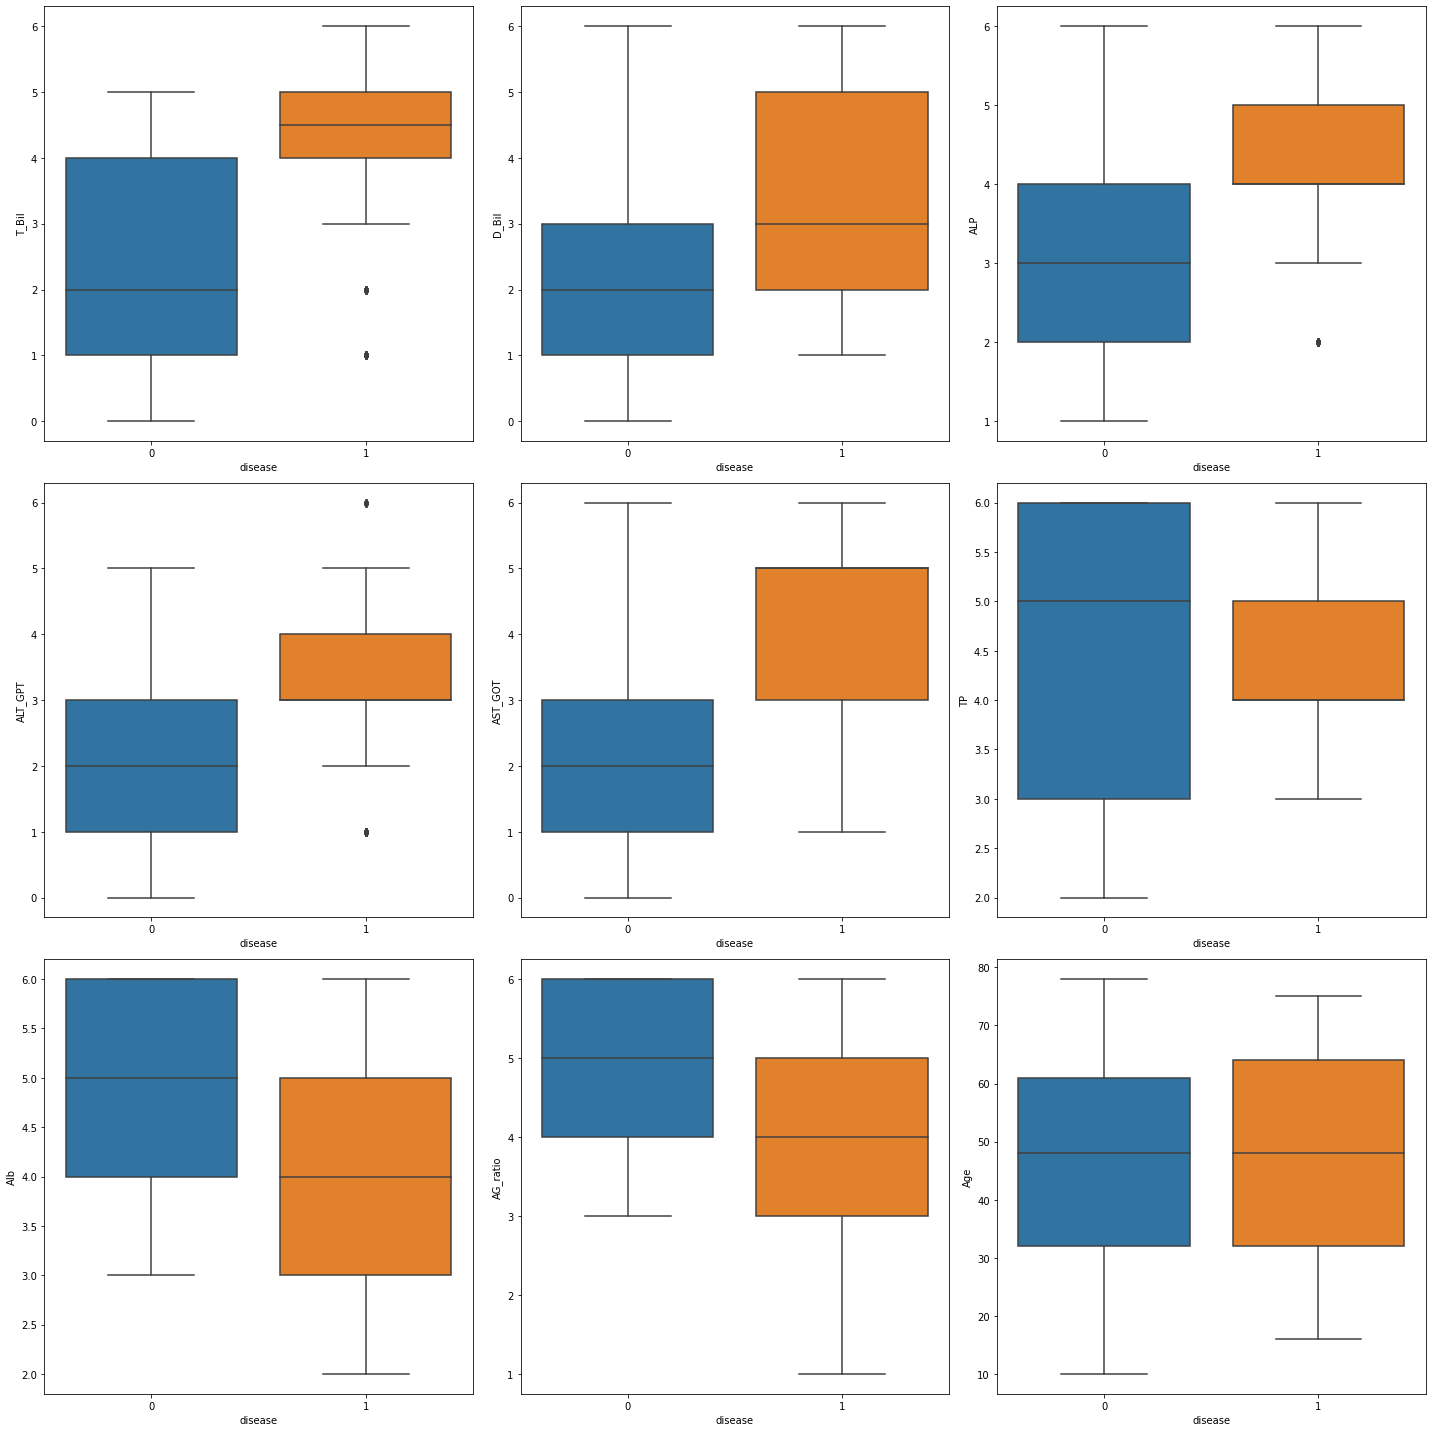

In [64]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil"   ,data=df_analize3,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil"   ,data=df_analize3,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP"     ,data=df_analize3,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT" ,data=df_analize3,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT" ,data=df_analize3,ax=ax[1][1])
sns.boxplot(x="disease",y="TP"      ,data=df_analize3,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb"     ,data=df_analize3,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df_analize3,ax=ax[2][1])
sns.boxplot(x="disease",y="Age"     ,data=df_analize3,ax=ax[2][2])
plt.tight_layout()


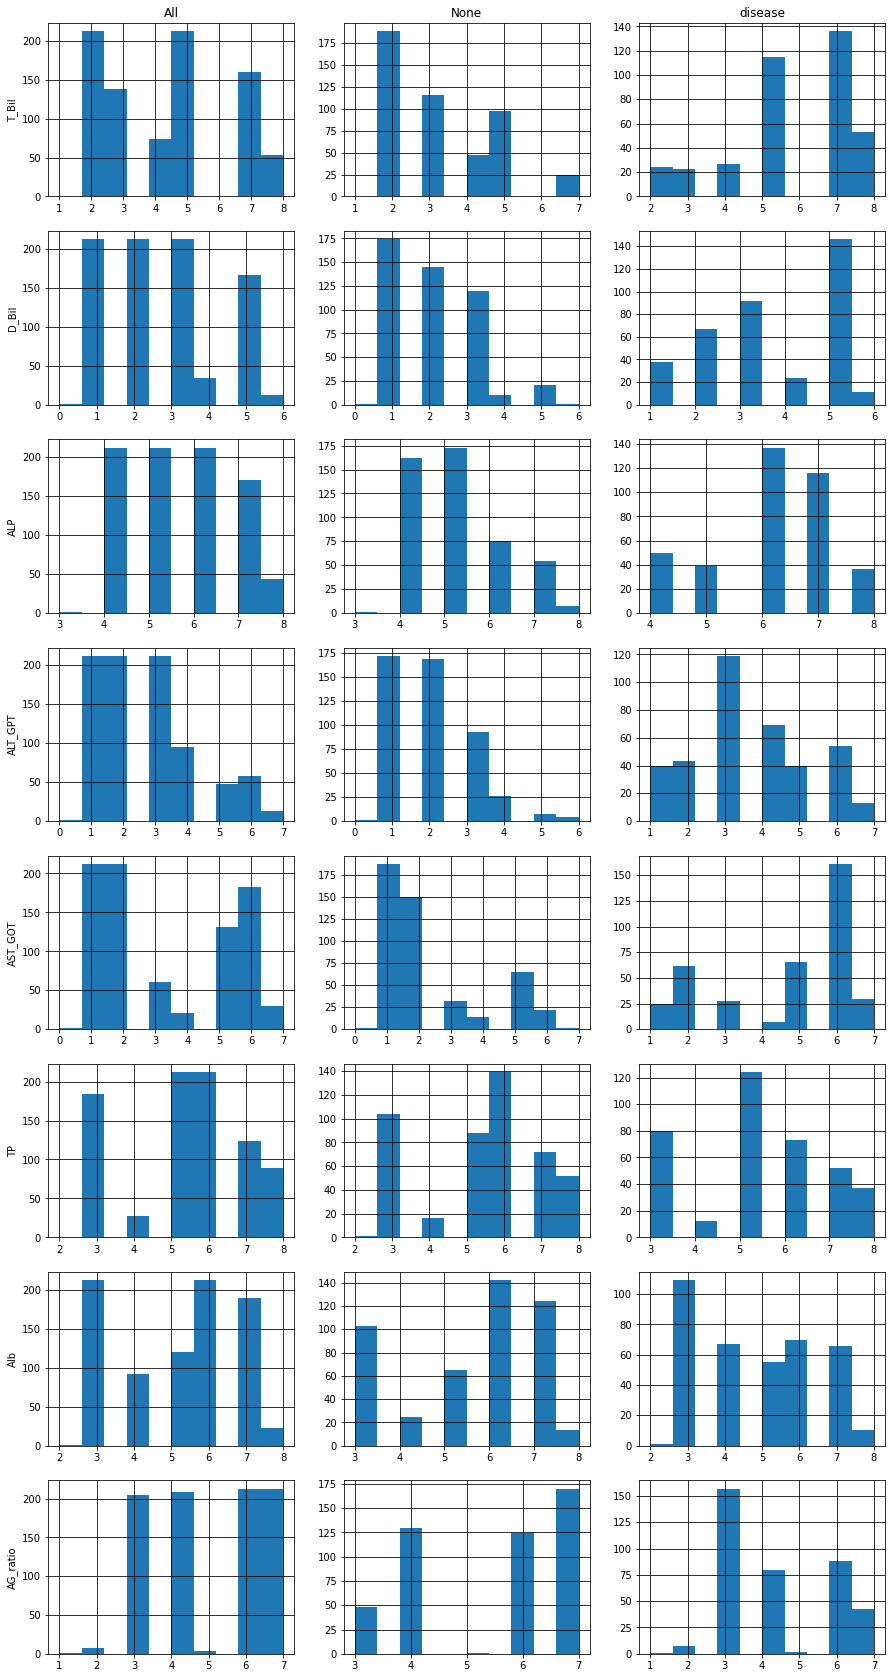

In [37]:
categ_cols = ['Age','Gender']
contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']

#n_x_cate = df[categ_cols].loc[df['disease']==0,:].copy()
n_x_cont = df_analize3[contin_cols].loc[df_analize3['disease']==0,:].copy()
#d_x_cate = df[categ_cols].loc[df['disease']==1,:].copy()
d_x_cont = df_analize3[contin_cols].loc[df_analize3['disease']==1,:].copy()

col_val=3
row_val=8

i = 0
plt.figure(figsize=(15,30))
for col in n_x_cont.columns.values:
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([df_analize3.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([n_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 2:
        plt.title('None')
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([d_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 3:
        plt.title('disease')
    i += 1
    

plt.show()

In [38]:
df_analize4 = df_analize3.copy()
# 重複レコードがあれば削除する
df_analize4.drop_duplicates(inplace=True)
# インデックスを採番しなおす
df_analize4.reset_index(drop=True, inplace=True)

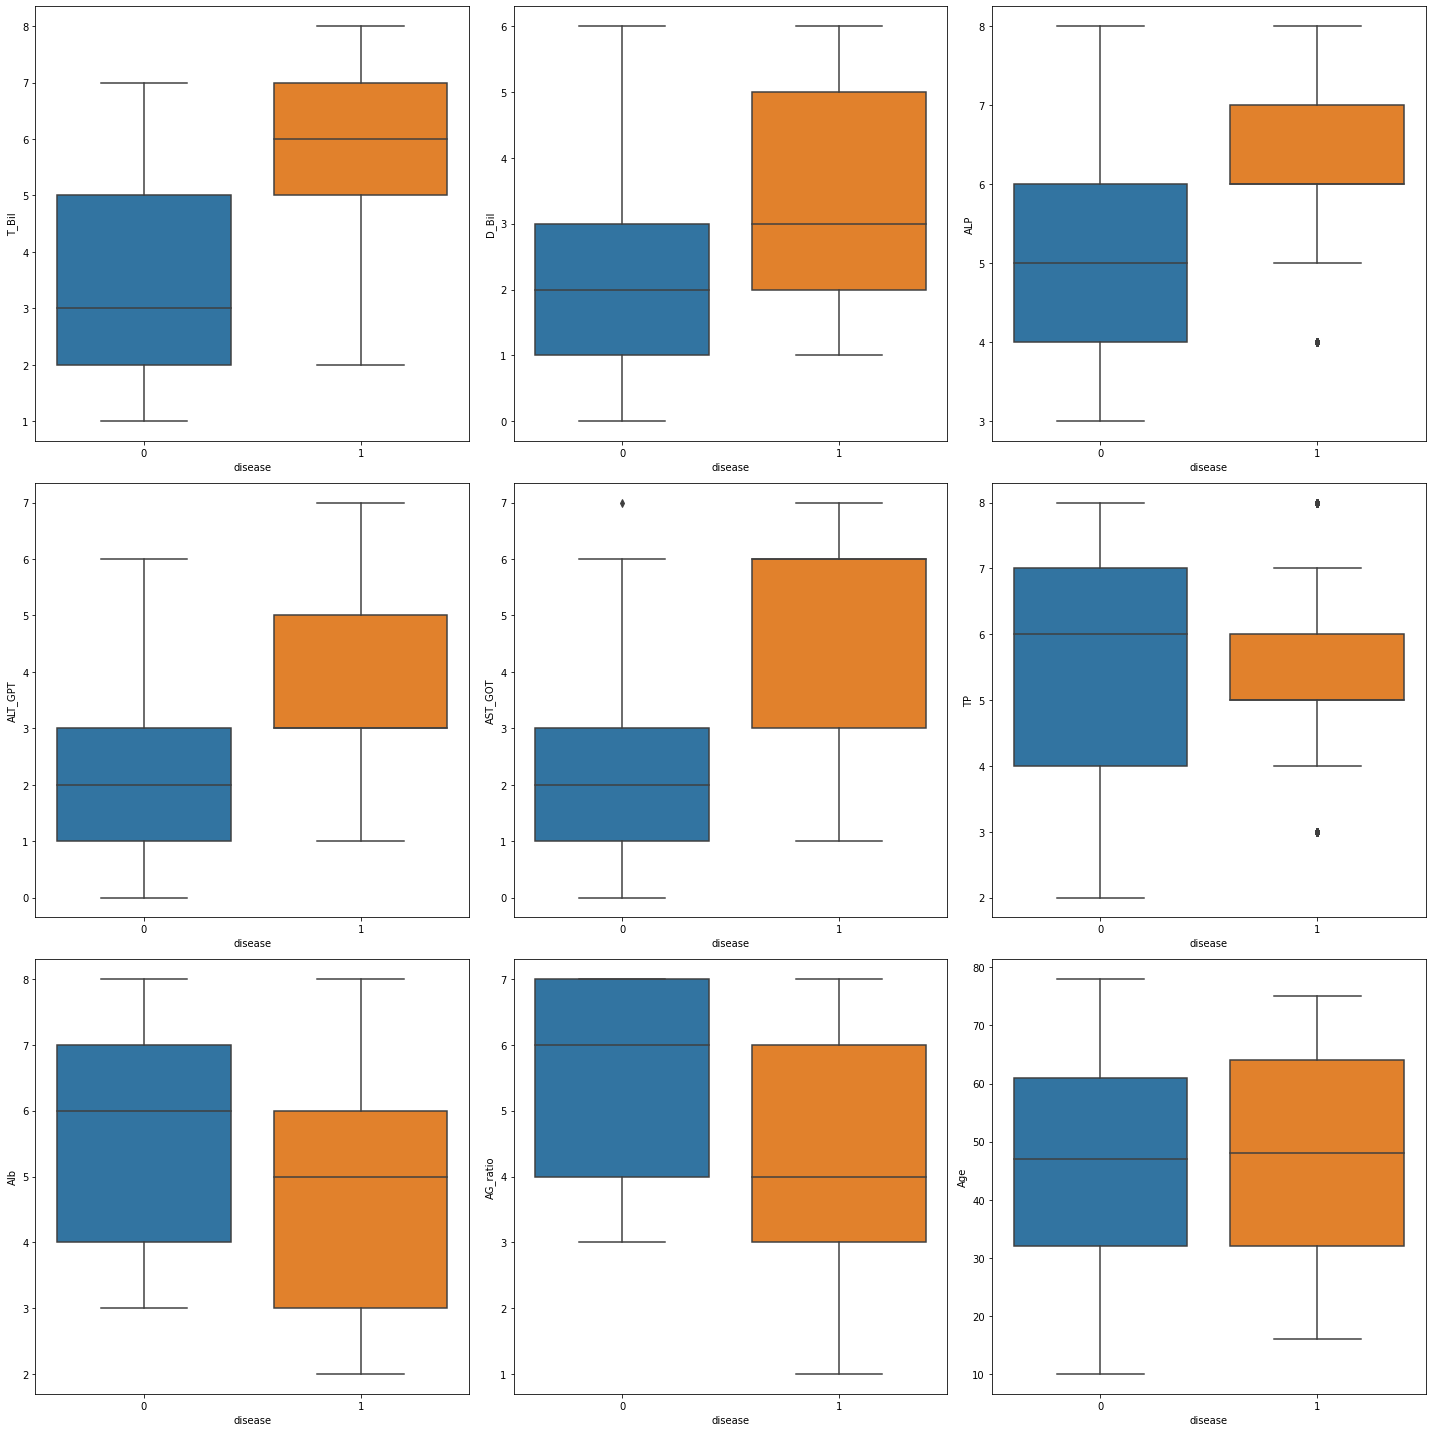

In [39]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil"   ,data=df_analize4,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil"   ,data=df_analize4,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP"     ,data=df_analize4,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT" ,data=df_analize4,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT" ,data=df_analize4,ax=ax[1][1])
sns.boxplot(x="disease",y="TP"      ,data=df_analize4,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb"     ,data=df_analize4,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df_analize4,ax=ax[2][1])
sns.boxplot(x="disease",y="Age"     ,data=df_analize4,ax=ax[2][2])
plt.tight_layout()


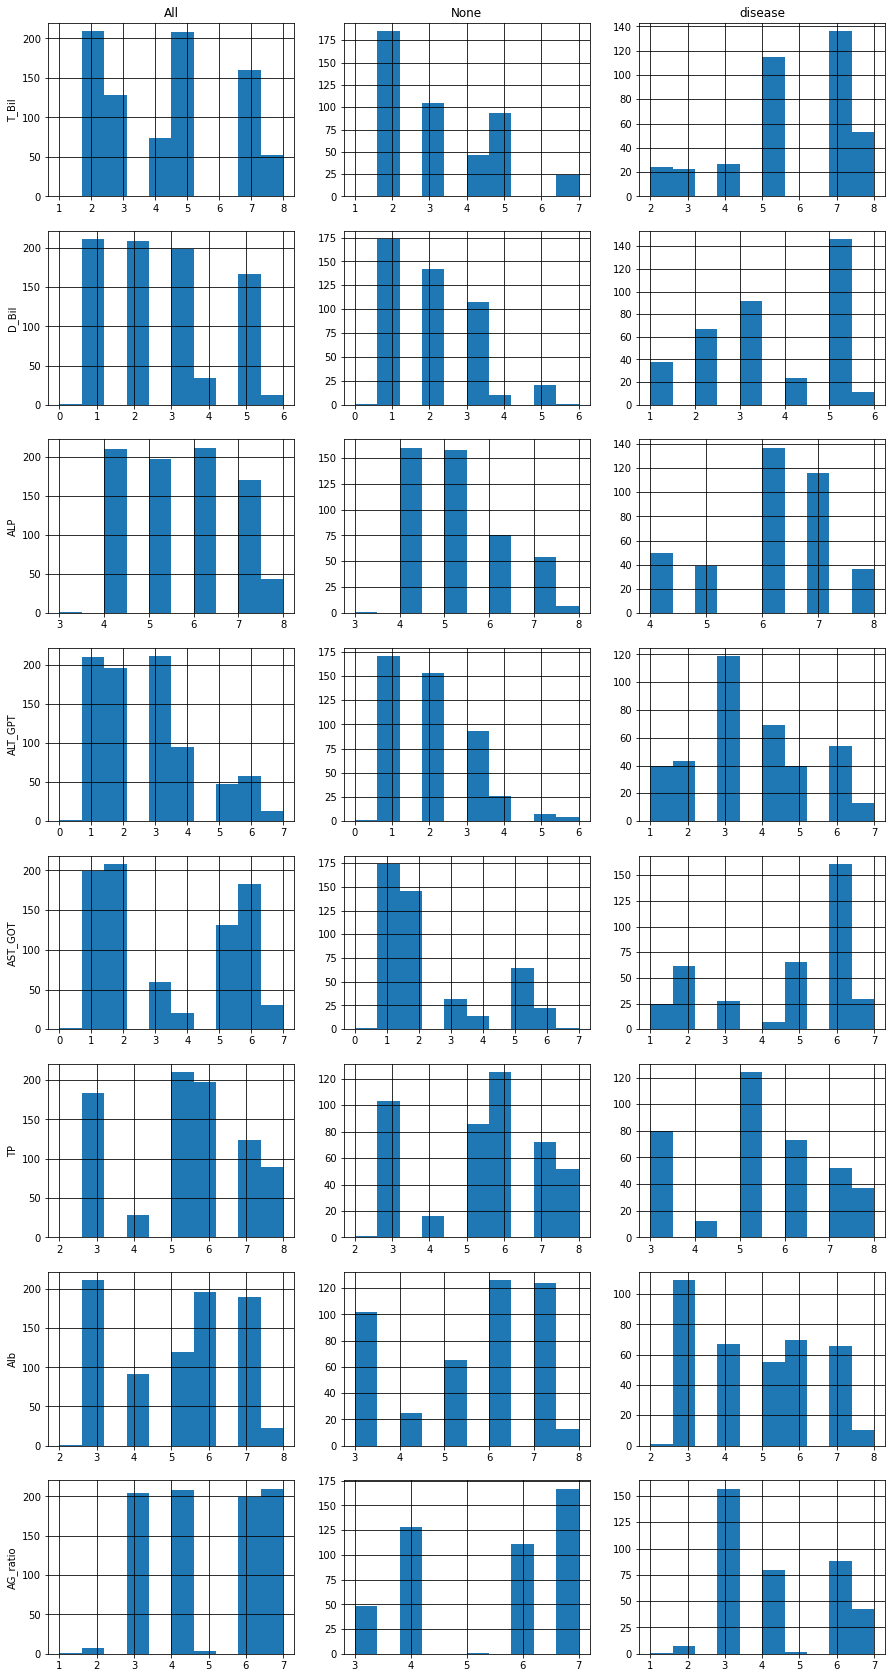

In [40]:
categ_cols = ['Age','Gender']
contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']

#n_x_cate = df[categ_cols].loc[df['disease']==0,:].copy()
n_x_cont = df_analize4[contin_cols].loc[df_analize4['disease']==0,:].copy()
#d_x_cate = df[categ_cols].loc[df['disease']==1,:].copy()
d_x_cont = df_analize4[contin_cols].loc[df_analize4['disease']==1,:].copy()

col_val=3
row_val=8

i = 0
plt.figure(figsize=(15,30))
for col in n_x_cont.columns.values:
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([df_analize4.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([n_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 2:
        plt.title('None')
    i += 1
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([d_x_cont.loc[:, col]])
    plt.grid(which='major',color='black',linestyle='-')
    if (i + 1) == 3:
        plt.title('disease')
    i += 1
    

plt.show()

# 10分割

In [25]:
df_train = pd.read_csv('train.csv')
df=df_train
gemder=pd.get_dummies(df.loc[:,['Gender']])
df['Age0']=gemder.loc[:,['Gender_Female']]
df['Age1']=gemder.loc[:,['Gender_Male']]
df = df.astype({'Age0': 'int32', 'Age1': 'int32'})
df.drop(columns=['Gender'],inplace=True)
df_desc = df.describe()

In [26]:
df_analize5 = df.copy()
df_analize5.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Age0,Age1
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,0,1
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1,0,1
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,0,1
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1,0,1
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,1,0


In [27]:
X_cut, bin_indice = pd.cut(df_analize5['TP'], bins=10, retbins=True)


In [15]:
X_cut.describe()

count                850
unique                 9
top       (6.799, 7.187]
freq                 228
Name: TP, dtype: object

In [16]:
bin_indice

array([4.85479864, 5.24671112, 5.63474327, 6.02277542, 6.41080757,
       6.79883972, 7.18687187, 7.57490402, 7.96293617, 8.35096833,
       8.73900048])

In [18]:
X_cut2, bin_indice = pd.cut(df_analize5['TP'], bins=10, retbins=True, labels=False)

In [19]:
X_cut2.head()

0    5
1    5
2    2
3    5
4    2
Name: TP, dtype: int64

In [20]:
bin_indice

array([4.85479864, 5.24671112, 5.63474327, 6.02277542, 6.41080757,
       6.79883972, 7.18687187, 7.57490402, 7.96293617, 8.35096833,
       8.73900048])

In [58]:
bins5 = []

def binSplit5(x_cont):
    contin_cols = ['T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']
    
    for col in contin_cols:
        #  describeで抽出可能な項目
        split_min = 0
        split_min2 = df_desc.loc['min',col]
        split_25 = df_desc.loc['25%',col]
        split_50 = df_desc.loc['50%',col]
        split_75 = df_desc.loc['75%',col]
        split_max=  df_desc.loc['max',col]
        split_max2=  df_desc.loc['max',col]*10
        
        # min ～25 の中央値
        row_idx1 = df.loc[(x_cont.loc[:,col]>=split_min2) & (x_cont.loc[:,col]<split_25) , col]
        split_12 = x_cont.loc[row_idx1.index , col].median()
        
        # 25 ～50 の中央値
        row_idx2 = df.loc[(x_cont.loc[:,col]>=split_25) & (x_cont.loc[:,col]<split_50)   , col]
        split_37 = x_cont.loc[row_idx2.index , col].median()
        
        # 50～75 の中央値
        row_idx3 = df.loc[(x_cont.loc[:,col]>=split_50) & (x_cont.loc[:,col]<split_75)   , col]
        split_62 = x_cont.loc[row_idx3.index , col].median()
        
        # 75～max の中央値
        row_idx4 = df.loc[(x_cont.loc[:,col]>=split_75) & (x_cont.loc[:,col]<split_max)  , col]
        split_87 = x_cont.loc[row_idx4.index , col].median()
        
        # 区切り設定と分割
        bins = [split_min,  split_min2, split_12,  split_25,  split_37, split_50, split_62, split_75, split_87, split_max, split_max2]
        bins = np.sort(bins)
        x_cont[col] = pd.cut(x_cont[col], bins=bins, labels=False)
        
    return x_cont
        
    

In [59]:
df_analize5_1=binSplit5(df_analize5.copy())

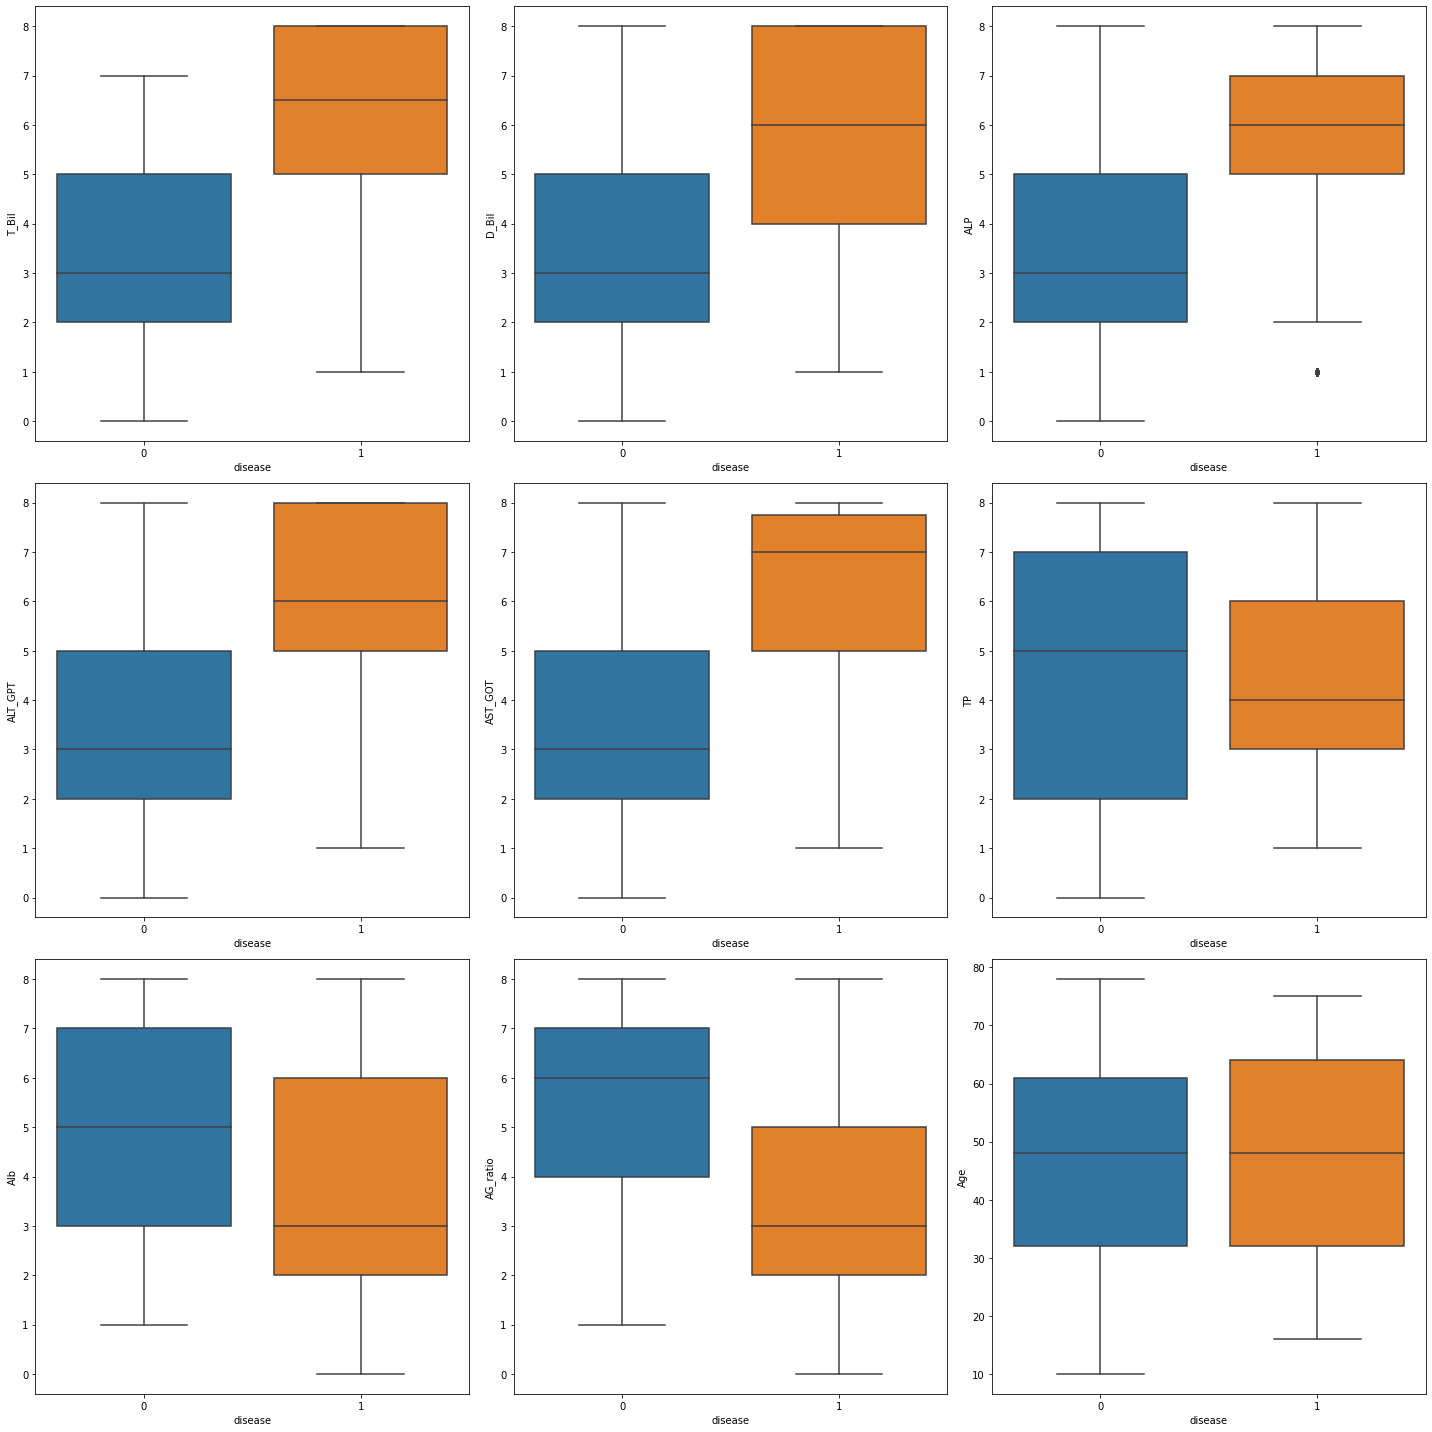

In [60]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
sns.boxplot(x="disease",y="T_Bil"   ,data=df_analize5_1,ax=ax[0][0])
sns.boxplot(x="disease",y="D_Bil"   ,data=df_analize5_1,ax=ax[0][1])
sns.boxplot(x="disease",y="ALP"     ,data=df_analize5_1,ax=ax[0][2])
sns.boxplot(x="disease",y="ALT_GPT" ,data=df_analize5_1,ax=ax[1][0])
sns.boxplot(x="disease",y="AST_GOT" ,data=df_analize5_1,ax=ax[1][1])
sns.boxplot(x="disease",y="TP"      ,data=df_analize5_1,ax=ax[1][2])
sns.boxplot(x="disease",y="Alb"     ,data=df_analize5_1,ax=ax[2][0])
sns.boxplot(x="disease",y="AG_ratio",data=df_analize5_1,ax=ax[2][1])
sns.boxplot(x="disease",y="Age"     ,data=df_analize5_1,ax=ax[2][2])
plt.tight_layout()


In [34]:
col = 'T_Bil'

split_min = 0
split_min2 = df_desc.loc['min',col]
split_25 = df_desc.loc['25%',col]
split_50 = df_desc.loc['50%',col]
split_75 = df_desc.loc['75%',col]
split_max=  df_desc.loc['max',col]
split_max2=  df_desc.loc['max',col]*10



In [52]:
print('min:' , split_min2)
print('25%:' , split_25)
print('50%:' , split_50)
print('75%:' , split_75)
print('max:' , split_max)

min: 0.5859610512881586
25%: 0.7812584352498221
50%: 0.8355914704225669
75%: 1.1967591288892714
max: 23.017026796629306


In [43]:
row_idx1 = df.loc[(df.loc[:,col]>=split_min2) & (df.loc[:,col]<split_25) , col]
row_idx2 = df.loc[(df.loc[:,col]>=split_25) & (df.loc[:,col]<split_50)   , col]
row_idx3 = df.loc[(df.loc[:,col]>=split_50) & (df.loc[:,col]<split_75)   , col]
row_idx4 = df.loc[(df.loc[:,col]>=split_75) & (df.loc[:,col]<split_max)  , col]

In [49]:
row_idx1.index

Int64Index([  2,   5,  10,  11,  26,  30,  32,  35,  41,  42,
            ...
            824, 825, 828, 830, 833, 837, 839, 845, 848, 849],
           dtype='int64', length=213)

In [51]:
df.loc[row_idx1.index , col].median()

0.7348365899841524

In [ ]:
bins = [split_min, split_min2,  split1,  split2,  split3, std_m,  std_p, split_max]